In [ ]:
!pip install GeodisTK

  Preparing metadata (setup.py) ... done
  Created wheel for GeodisTK: filename=GeodisTK-0.1.7-cp310-cp310-linux_x86_64.whl size=186881 sha256=10d3cca95bce0d1d19f5a95c75ac005f653a11175132e8da17149cbc1defc9c3
  Stored in directory: /root/.cache/pip/wheels/f2/12/43/7a79927d541a85dc3fe26c3a0e718a01c4e0074855bf9c8941
Successfully built GeodisTK


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**GeodisTK Demo**

repo: https://github.com/taigw/GeodisTK/tree/master

In [ ]:
geodistk_path = "/content/drive/MyDrive/Course/研一上/深度學習之於生醫/final presentation/data"

example list
example for gray scale image
runtime(s) of fast marching 0.05862998962402344
runtime(s) of raster  scan  0.04040646553039551


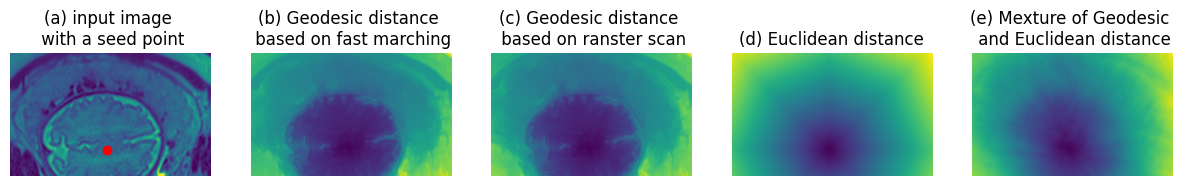

example for RB image
runtime(s) of fast marching 0.18663835525512695
runtime(s) of raster  scan  0.1187899112701416


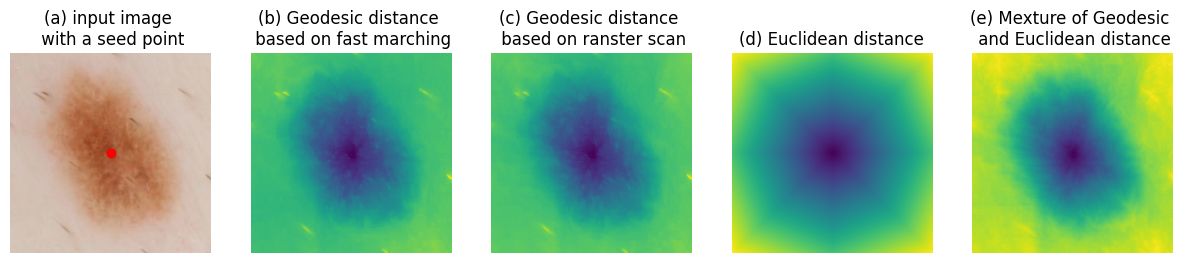

In [ ]:
import GeodisTK
import numpy as np
import time
from PIL import Image
import matplotlib.pyplot as plt


def geodesic_distance_2d(I, S, lamb, iter):
    '''
    get 2d geodesic disntance by raser scanning.
    I: input image, can have multiple channels. Type should be np.float32.
    S: binary image where non-zero pixels are used as seeds. Type should be np.uint8.
    lamb: weighting betwween 0.0 and 1.0
          if lamb==0.0, return spatial euclidean distance without considering gradient
          if lamb==1.0, the distance is based on gradient only without using spatial distance
    iter: number of iteration for raster scanning.
    '''
    return GeodisTK.geodesic2d_raster_scan(I, S, lamb, iter)

def demo_geodesic_distance2d(img, seed_pos):
    I = np.asanyarray(img, np.float32)
    S = np.zeros((I.shape[0], I.shape[1]), np.uint8)
    S[seed_pos[0]][seed_pos[1]] = 1
    t0 = time.time()
    D1 = GeodisTK.geodesic2d_fast_marching(I,S)
    t1 = time.time()
    D2 = geodesic_distance_2d(I, S, 1.0, 2)
    dt1 = t1 - t0
    dt2 = time.time() - t1
    D3 = geodesic_distance_2d(I, S, 0.0, 2)
    D4 = geodesic_distance_2d(I, S, 0.5, 2)
    print("runtime(s) of fast marching {0:}".format(dt1))
    print("runtime(s) of raster  scan  {0:}".format(dt2))

    plt.figure(figsize=(15,5))
    plt.subplot(1,5,1); plt.imshow(img)
    plt.autoscale(False);  plt.plot([seed_pos[0]], [seed_pos[1]], 'ro')
    plt.axis('off'); plt.title('(a) input image \n with a seed point')

    plt.subplot(1,5,2); plt.imshow(D1)
    plt.axis('off'); plt.title('(b) Geodesic distance \n based on fast marching')

    plt.subplot(1,5,3); plt.imshow(D2)
    plt.axis('off'); plt.title('(c) Geodesic distance \n based on ranster scan')

    plt.subplot(1,5,4); plt.imshow(D3)
    plt.axis('off'); plt.title('(d) Euclidean distance')

    plt.subplot(1,5,5); plt.imshow(D4)
    plt.axis('off'); plt.title('(e) Mexture of Geodesic \n and Euclidean distance')
    plt.show()

def demo_geodesic_distance2d_gray_scale_image():
    img = Image.open(f'{geodistk_path}/img2d.png').convert('L')
    seed_position = [100, 100]
    demo_geodesic_distance2d(img, seed_position)

def demo_geodesic_distance2d_RGB_image():
    img = Image.open(f'{geodistk_path}/ISIC_546.jpg')
    seed_position = [128, 128]
    demo_geodesic_distance2d(img, seed_position)

if __name__ == '__main__':
    print("example list")
    print("example for gray scale image")
    demo_geodesic_distance2d_gray_scale_image()

    print("example for RB image")
    demo_geodesic_distance2d_RGB_image()

In [ ]:
!pip install SimpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 18.0 MB/s eta 0:00:00


runtime(s) fast marching 55.31885075569153
runtime(s) raster scan   1.46844482421875


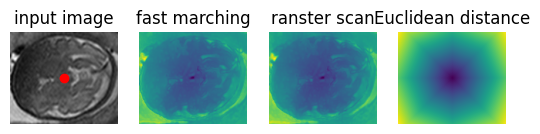

In [ ]:
import GeodisTK
import time
import psutil
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
from PIL import Image

def geodesic_distance_3d(I, S, spacing, lamb, iter):
    '''
    Get 3D geodesic disntance by raser scanning.
    I: input image array, can have multiple channels, with shape [D, H, W] or [D, H, W, C]
       Type should be np.float32.
    S: binary image where non-zero pixels are used as seeds, with shape [D, H, W]
       Type should be np.uint8.
    spacing: a tuple of float numbers for pixel spacing along D, H and W dimensions respectively.
    lamb: weighting betwween 0.0 and 1.0
          if lamb==0.0, return spatial euclidean distance without considering gradient
          if lamb==1.0, the distance is based on gradient only without using spatial distance
    iter: number of iteration for raster scanning.
    '''
    return GeodisTK.geodesic3d_raster_scan(I, S, spacing, lamb, iter)

def demo_geodesic_distance3d():
    input_name = f"{path}/img3d.nii.gz"
    img = sitk.ReadImage(input_name)
    I   = sitk.GetArrayFromImage(img)
    spacing_raw = img.GetSpacing()
    spacing = [spacing_raw[2], spacing_raw[1],spacing_raw[0]]
    I = np.asarray(I, np.float32)
    I = I[18:38, 63:183, 93:233 ]
    S = np.zeros_like(I, np.uint8)
    S[10][60][70] = 1
    t0 = time.time()
    D1 = GeodisTK.geodesic3d_fast_marching(I,S, spacing)
    t1 = time.time()
    D2 = geodesic_distance_3d(I,S, spacing, 1.0, 4)
    dt1 = t1 - t0
    dt2 = time.time() - t1
    D3 = geodesic_distance_3d(I,S, spacing, 0.0, 4)
    print("runtime(s) fast marching {0:}".format(dt1))
    print("runtime(s) raster scan   {0:}".format(dt2))

    img_d1 = sitk.GetImageFromArray(D1)
    img_d1.SetSpacing(spacing_raw)
    sitk.WriteImage(img_d1, f"{geodistk_path}/image3d_dis1.nii.gz")

    img_d2 = sitk.GetImageFromArray(D2)
    img_d2.SetSpacing(spacing_raw)
    sitk.WriteImage(img_d2, f"{geodistk_path}/image3d_dis2.nii.gz")

    img_d3 = sitk.GetImageFromArray(D3)
    img_d3.SetSpacing(spacing_raw)
    sitk.WriteImage(img_d3, f"{geodistk_path}/image3d_dis3.nii.gz")

    I_sub = sitk.GetImageFromArray(I)
    I_sub.SetSpacing(spacing_raw)
    sitk.WriteImage(I_sub, f"{geodistk_path}/image3d_sub.nii.gz")

    I = I*255/I.max()
    I = np.asarray(I, np.uint8)

    I_slice = I[10]
    D1_slice = D1[10]
    D2_slice = D2[10]
    D3_slice = D3[10]
    plt.subplot(1,4,1); plt.imshow(I_slice, cmap='gray')
    plt.autoscale(False);  plt.plot([70], [60], 'ro')
    plt.axis('off'); plt.title('input image')

    plt.subplot(1,4,2); plt.imshow(D1_slice)
    plt.axis('off'); plt.title('fast marching')

    plt.subplot(1,4,3); plt.imshow(D2_slice)
    plt.axis('off'); plt.title('ranster scan')

    plt.subplot(1,4,4); plt.imshow(D3_slice)
    plt.axis('off'); plt.title('Euclidean distance')
    plt.show()

if __name__ == '__main__':
    demo_geodesic_distance3d()

##**MIDeepSeg Demo**

repo: https://github.com/HiLab-git/MIDeepSeg

In [ ]:
second_demo_path = "/content/drive/MyDrive/Course/研一上/深度學習之於生醫/final presentation/MIDeepSeg-master"

runtime(s) of fast marching 2.187875747680664
runtime(s) of raster  scan  0.2597494125366211


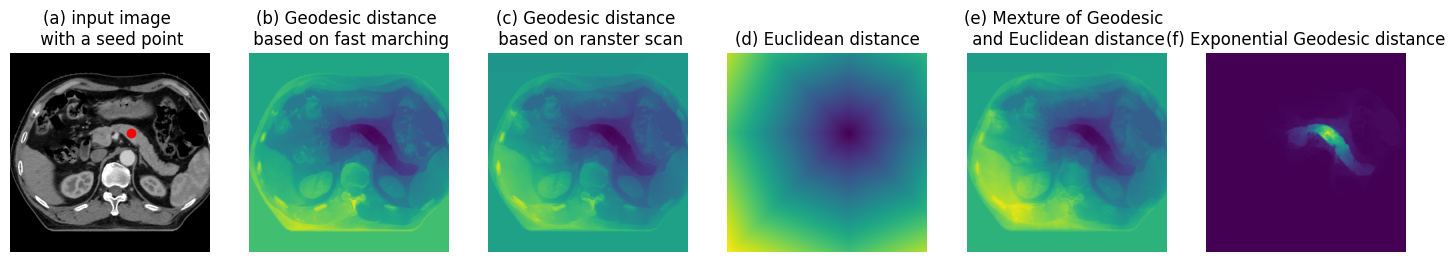

In [ ]:
# -*- coding: utf-8 -*-
# Author: Xiangde Luo
# Date:   2 Sep., 2021
# Implementation of MIDeepSeg for interactive medical image segmentation and annotation.
# This file was borrowed from [GeodisTK](https://github.com/taigw/GeodisTK)
# Reference:
#     [1] X. Luo and G. Wang et al. MIDeepSeg: Minimally interactive segmentation of unseen objects
#     from medical images using deep learning. Medical Image Analysis, 2021. DOI:https://doi.org/10.1016/j.media.2021.102102.
#     [2] Wang, Guotai, et al. "DeepIGeoS: A deep interactive geodesic framework for medical image segmentation." TPAMI, 2018.

import GeodisTK
import numpy as np
import time
from PIL import Image
import matplotlib.pyplot as plt


def geodesic_distance_2d(I, S, lamb, iter):
    '''
    get 2d geodesic disntance by raser scanning.
    I: input image, can have multiple channels. Type should be np.float32.
    S: binary image where non-zero pixels are used as seeds. Type should be np.uint8.
    lamb: weighting betwween 0.0 and 1.0
          if lamb==0.0, return spatial euclidean distance without considering gradient
          if lamb==1.0, the distance is based on gradient only without using spatial distance
    iter: number of iteration for raster scanning.
    '''
    return GeodisTK.geodesic2d_raster_scan(I, S, lamb, iter)


def demo_geodesic_distance2d(img, seed_pos):
    I = np.asanyarray(img, np.float32)
    S = np.zeros((I.shape[0], I.shape[1]), np.uint8)
    S[seed_pos[0]][seed_pos[1]] = 1
    t0 = time.time()
    D1 = GeodisTK.geodesic2d_fast_marching(I, S)
    t1 = time.time()
    D2 = geodesic_distance_2d(I, S, 1.0, 2)
    dt1 = t1 - t0
    dt2 = time.time() - t1
    D3 = geodesic_distance_2d(I, S, 0.0, 2)
    D4 = geodesic_distance_2d(I, S, 0.5, 2)
    print("runtime(s) of fast marching {0:}".format(dt1))
    print("runtime(s) of raster  scan  {0:}".format(dt2))

    plt.figure(figsize=(18, 6))
    plt.subplot(1, 6, 1)
    plt.imshow(img, "gray")
    plt.autoscale(False)
    plt.plot([seed_pos[1]], [seed_pos[0]], 'ro')
    plt.axis('off')
    plt.title('(a) input image \n with a seed point')

    plt.subplot(1, 6, 2)
    plt.imshow(D1)
    plt.axis('off')
    plt.title('(b) Geodesic distance \n based on fast marching')

    plt.subplot(1, 6, 3)
    plt.imshow(D2)
    plt.axis('off')
    plt.title('(c) Geodesic distance \n based on ranster scan')

    plt.subplot(1, 6, 4)
    plt.imshow(D3)
    plt.axis('off')
    plt.title('(d) Euclidean distance')

    plt.subplot(1, 6, 5)
    plt.imshow(D4)
    plt.axis('off')
    plt.title('(e) Mexture of Geodesic \n and Euclidean distance')

    plt.subplot(1, 6, 6)
    plt.imshow(np.exp(-D1))
    plt.axis('off')
    plt.title('(f) Exponential Geodesic distance')
    plt.savefig(f"{second_demo_path}/demo_dataset/egd_vis.png",
                bbox_inches='tight', dpi=500, pad_inches=0.0)
    plt.show()


def demo_geodesic_distance2d_gray_scale_image():
    img = Image.open(f'{second_demo_path}/demo_dataset/pancreas.png').convert('L')
    img = np.array(img)[100:400, 100:400]
    img = (img - img.mean()) / img.std()
    seed_position = [121, 182]
    demo_geodesic_distance2d(img, seed_position)


if __name__ == '__main__':
    demo_geodesic_distance2d_gray_scale_image()

##**SimpleCRF Demo**

repo: https://github.com/HiLab-git/SimpleCRF

In [ ]:
!pip install SimpleCRF==0.1.0
!pip install PyQt5==5.15.4
!pip install scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for SimpleCRF: filename=SimpleCRF-0.1.0-cp310-cp310-linux_x86_64.whl size=3728419 sha256=ecd1969e737516d92718888574fabdf9d5a80c510c26d368bd71a27ca5cf060e
  Stored in directory: /root/.cache/pip/wheels/51/f4/4a/5f385d0a88ee2f50066546dcd988038bee981c724744594985
Successfully built SimpleCRF
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.1/338.1 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 9.5 MB/s eta 0:00:00


In [ ]:
# from path
# -*- coding: utf-8 -*-
# Author: Xiangde Luo
# Date:   2 Sep., 2021
# Implementation of MIDeepSeg for interactive medical image segmentation and annotation.
# Reference:
#     X. Luo and G. Wang et al. MIDeepSeg: Minimally interactive segmentation of unseen objects
#     from medical images using deep learning. Medical Image Analysis, 2021. DOI:https://doi.org/10.1016/j.media.2021.102102.

import os
import sys
from PyQt5.QtGui import *
from PyQt5.QtWidgets import *
from PyQt5.QtCore import *

# 設置MIDeepSeg的絕對路徑
middeepseg_path = "/content/drive/MyDrive/Course/研一上/深度學習之於生醫/final presentation/MIDeepSeg-master/mideepseg"
sys.path.append(middeepseg_path)

# 導入gui
from gui import MIDeepSeg

if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = MIDeepSeg()
    sys.exit(app.exec_())